GRUPO:


 



Bedón Adrián

Merlo José Miguel

Moreta Andrés

Ocaña Dennis

Ramos Xavier

# INSTALACION DE COMPONENTES PARA ACELERACION POR GPU NVIDIA
En caso de no poder ser ejecutado o disponer de una GPU de AMD 
saltar estas líneas y eliminar las notaciones de @njit

In [1]:
# Para su uso con Numba
# Requiere una GPU de NVIDIA

In [2]:
conda install cudatoolkit 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Libreria numba para permitir matemáticas rápidas
# y metodos acelerados por GPU

In [4]:
conda install numba

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Importación de Librerias

In [5]:
import numpy as np #importamos numpy para utilizar linspace
import matplotlib.pyplot as plt #importamos para graficar las funciones
import numba as nb #se importa numba para aceleracion por GPU en diversas funciones
from numba import cuda #para aceleracion por GPU en diversas funciones
from numba import jit #para aceleracion por GPU en diversas funciones
from numba import njit #para aceleracion por GPU en diversas funciones

Definimos las funciones para el calculo de los circulos externos

Estas funciones fueron deducidas con la ayuda del portal https://www.bbc.co.uk/bitesize/guides/z9pssbk/revision/2

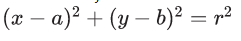

Esta fue despejada para y usando Symbolab y posteriormente ajustada usando desmos. El resultado es

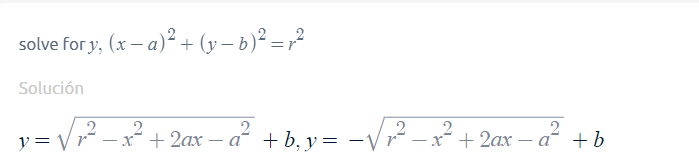

Siendo la formula con la raíz positiva para la parte superior o convexa del círculo y la fórmula con la raíz negativa para la parte cóncava o inferior del círculo. De esta manera queda:

In [6]:
@njit
def f(x,r,a,b): # definimos la función para la parte superior del círculo
    """
    r: radio
    x: posicion a evaluar
    a: Coordenada X en el plano cartesiano
    b: Coordenada Y en el plano cartesiano
    """
    y = np.sqrt(r**2-x**2+2*a*x-a**2)+b # función para el círculo superior
    return y;  # evaluamos fx

In [7]:
@njit
def fm(x,r,a,b): # definimos la función para la parte inferior del circulo
    """í    r: radio
    x: posicion a evaluar
    a: Coordenada X en el plano cartesiano
    b: Coordenada Y en el plano cartesiano
    """
    y = -(np.sqrt(r**2-x**2+2*a*x-a**2)) + b # función para el círculo inferior
    return y;  # evaluamos fx

Calcularemos el área bajo la curva usando Montecarlo
Usando el método de sampling.

Abajo quedan declaradas las funciones a usar

In [8]:
# Obtenemos una muestra en el intervalo (a, b)

def realizar_muestra(a, b, n=10):
    """
    a, b: intervalo
    n: tamaño de la muestra
    """
    return np.random.random(n)*(b - a) + a


def evaluar_fx_muestra(m,r,x,y):
    """
    m: muestra (array)
    evaluamos la función f definida arriba
    """
    return f(m,r,x,y)

def evaluar_fx_muestraINV(m,r,x,y):
    """
    m: muestra (array)
    evaluamos la función f definida arriba
    """
    return fm(m,r,x,y)

## Montecarlo por método de muestreo o SAMPLING - Implementacion 1 - Cálculo total

Area para n=1 es 0.18160558857272618
Area para n=10000 es 0.3156236283490219


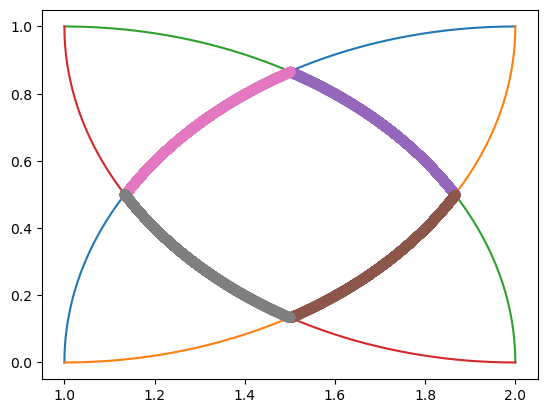

In [9]:
# DATOS de posicion para los círculos y limites del área total
ad,bd = 1.5, 1.866 # limites mitad derecha
ai,bi = 1.133, 1.5 # limites mitad izq
c = 1 # limite superior
cx1,cy1 = 2,0 # posicion x , y del circulo 1
cx2,cy2 = 1,1 # posicion x , y del circulo 2
cx3,cy3 = 1,0 # posicion x , y del circulo 3
cx4,cy4 = 2,1 # posicion x , y del circulo 4
r = 1 # radio del circulo

# Definimos las variables que contendran los resultados de cada funcion y se asigna los valores mediante los metodos definidos anteriormente
x = np.linspace(1, 2, 10000)  # Rango para la variable x
fx1 = f(x,r,cx1,cy1)  # Evaluamos f(x)
fx2 = fm(x,r,cx2,cy2)  # Evaluamos f(x)
fx3 = f(x,r,cx3,cy3)  # Evaluamos f(x)
fx4 = fm(x,r,cx4,cy4)  # Evaluamos f(x)

# Gráficos
plt.plot(x, fx1); # Dibujamos f1(x)
plt.plot(x, fx2); # Dibujamos f2(x)
plt.plot(x, fx3); # Dibujamos f3(x)
plt.plot(x, fx4); # Dibujamos f4(x)

# Implementación 1

t_muestras = [1, 10000]  # Rango T

for t in t_muestras:
    x_md = realizar_muestra(ad, bd, t)
    x_mi = realizar_muestra(ai, bi, t)
    f1_m = evaluar_fx_muestra(x_md,r,cx3,cy3) 
    f2_m = evaluar_fx_muestraINV(x_md,r,cx2,cy2)
    f3_m = evaluar_fx_muestra(x_mi,r,cx1,cy1) 
    f4_m = evaluar_fx_muestraINV(x_mi,r,cx4,cy4)
    areaDer = ((bd-ad)*sum(f1_m)/t) - ((bd-ad)*sum(f2_m)/t) #Calculamos area del lado derecho
    areaIzq = ((bi-ai)*sum(f3_m)/t) - ((bi-ai)*sum(f4_m)/t) #Calculamos area del lado izquierdo
    print("Area para n="+str(t), "es", areaDer + areaIzq) #sumamos las areas para desplegar el resultado
    
plt.plot(x_md, f1_m, 'o')  # Graficamos cada punto de la muestra (md, f1mi)
plt.plot(x_md, f2_m, 'o')  # Graficamos cada punto de la muestra (md, f2mi)
plt.plot(x_mi, f3_m, 'o')  # Graficamos cada punto de la muestra (mi, f3mi)
plt.plot(x_mi, f4_m, 'o')  # Graficamos cada punto de la muestra (mi, f4mi)
plt.show()

## Montecarlo por método de muestreo o SAMPLING - Implementacion 2 - Cálculo parcial

Area para n=1 es 0.14395363661608973
Area para n=10000 es 0.3159900647985024


<function matplotlib.pyplot.show(close=None, block=None)>

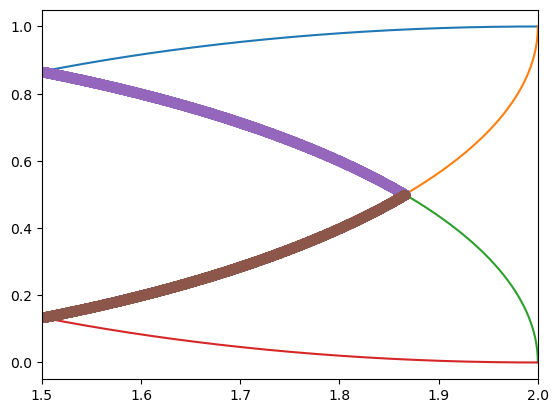

In [10]:
#Implementacion 2

for t in t_muestras:
    x_md = realizar_muestra(ad, bd, t)
    f1_m = evaluar_fx_muestra(x_md,r,cx3,cy3) 
    f2_m = evaluar_fx_muestraINV(x_md,r,cx2,cy2)
    areaDer = ((bd-ad)*sum(f1_m)/t) - ((bd-ad)*sum(f2_m)/t) #Calculamos area del lado derecho
    print("Area para n="+str(t), "es", areaDer*2) #multiplicamos el area x2 debido a que ambos lados son simetricos

plt.plot(x, fx1); # Dibujamos f(x)
plt.plot(x, fx2); # Dibujamos f(x)
plt.plot(x, fx3); # Dibujamos f(x)
plt.plot(x, fx4); # Dibujamos f(x)
plt.plot(x_md, f1_m, 'o')  # Graficamos cada punto de la muestra (mi, fmi)
plt.plot(x_md, f2_m, 'o')  # Graficamos cada punto de la muestra (mi, fmi)
plt.xlim([1.5, 2])
plt.show

El área es = 0.31 aproximadamente
Ambas implementaciones son correctas y dan resultados similares.
Por otro lado, la segunda implementación llega a ser mas rapida al solo calcular la mitad de la figura. Esta se basa en el conocimiento que la figura es simétrica y debido a ello
calcula los valores del lado derecho para así doblarlos y obtener un resultado total. Ambos métodos pueden ser usados pero se recomienda utilizar el segundo en caso de necesitar realizar
una cantidad de muestras más grande por temas de rendimiento.

## Montecarlo por método de Hit and Miss - Implementacion 1 - Cálculo total

0.318

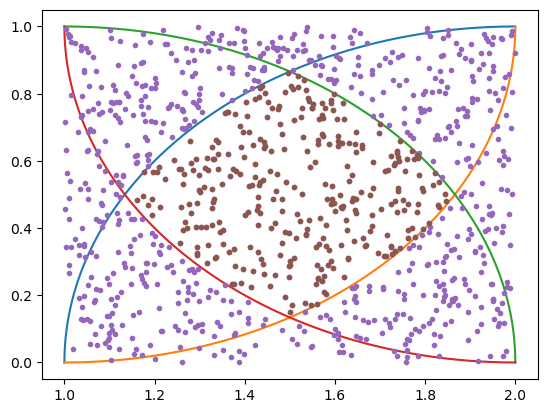

In [16]:
# Graficamos la función
ad,bd = 1.5, 1.866 #ancho parte derecha
ai,bi = 1.133, 1.5 #ancho parte izq
c = 1 #alto
cx1,cy1 = 2,0
cx2,cy2 = 1,1
cx3,cy3 = 1,0
cx4,cy4 = 2,1
r = 1


#Definimos las funciones a usar para recrear al forma
x = np.linspace(1, 2, 10000)  # Rango para la variable x
fx1 = f(x,r,cx1,cy1)  # Evaluamos f(x)
fx2 = fm(x,r,cx2,cy2)  # Evaluamos f(x)
fx3 = f(x,r,cx3,cy3)  # Evaluamos f(x)
fx4 = fm(x,r,cx4,cy4)  # Evaluamos f(x)
plt.plot(x, fx1); # Dibujamos f(x)
plt.plot(x, fx2); # Dibujamos f(x)
plt.plot(x, fx3); # Dibujamos f(x)
plt.plot(x, fx4); # Dibujamos f(x)

#Definimos el Ancho del Tablero
a, b = 1, 2
c = 1 #Definimos el Alto del Tablero

n=1000

#Implementación 1
xi_random = np.random.random(size=n)*(b-a)+a 
yi_random = np.random.random(size=n)*c

plt.plot(xi_random, yi_random, '.')

dentro = np.where((f(xi_random, r, cx1, cy1) > yi_random) & (fm(xi_random, r, cx2, cy2) < yi_random) & (f(xi_random, r, cx3, cy3) > yi_random) & (fm(xi_random, r, cx4, cy4) < yi_random))[0]
fuera = np.where((f(xi_random, r, cx1, cy1) < yi_random) & (fm(xi_random, r, cx2, cy2) > yi_random) & (f(xi_random, r, cx3, cy3) < yi_random) & (fm(xi_random, r, cx4, cy4) > yi_random))[0]

plt.plot(xi_random[dentro], yi_random[dentro], '.')

(b-a)*c*len(dentro)/n

## Montecarlo por método de Hit and Miss - Implementacion 2 - Cálculo parcial

0.314

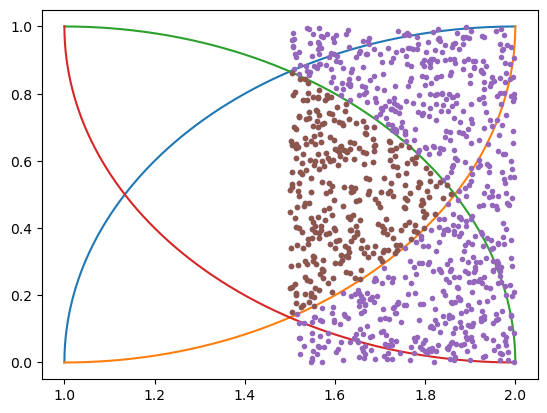

In [17]:
#Definimos las funciones a usar para recrear al forma
x = np.linspace(1, 2, 10000)  # Rango para la variable x
fx1 = f(x,r,cx1,cy1)  # Evaluamos f(x)
fx2 = fm(x,r,cx2,cy2)  # Evaluamos f(x)
fx3 = f(x,r,cx3,cy3)  # Evaluamos f(x)
fx4 = fm(x,r,cx4,cy4)  # Evaluamos f(x)
plt.plot(x, fx1); # Dibujamos f(x)
plt.plot(x, fx2); # Dibujamos f(x)
plt.plot(x, fx3); # Dibujamos f(x)
plt.plot(x, fx4); # Dibujamos f(x)

#Definimos el Ancho del Tablero (Únicamente la mitad)
a, b = 1.5, 2
c = 1 #Definimos el Alto del Tablero

n=1000

#Implementación 2
xi_random = np.random.random(size=n)*(b-a)+a 
yi_random = np.random.random(size=n)*c

plt.plot(xi_random, yi_random, '.')

dentro = np.where((f(xi_random, r, cx1, cy1) > yi_random) & (fm(xi_random, r, cx2, cy2) < yi_random) & (f(xi_random, r, cx3, cy3) > yi_random) & (fm(xi_random, r, cx4, cy4) < yi_random))[0]
fuera = np.where((f(xi_random, r, cx1, cy1) < yi_random) & (fm(xi_random, r, cx2, cy2) > yi_random) & (f(xi_random, r, cx3, cy3) < yi_random) & (fm(xi_random, r, cx4, cy4) > yi_random))[0]

plt.plot(xi_random[dentro], yi_random[dentro], '.')

((b-a)*c*len(dentro)/n)*2

 Él valor del área es de aproximadamente 0.31. Las dos implementaciones planteadas son correctas y se pudo comprobar que la aplicación del método de Sampling también genera valores similares para el área, además se pudo observar que para el método de Hit and Miss, el uso de una de las mitades de la figura puede significar una pérdida en los valores decimales por lo que consideramos el uso de la figura completa como la mejor alternativa para este método

## Fuentes utilizadas

https://anaconda.org/marsgr6/simulation_notebook/notebook - Referencia del método de integración por Montecarlo

https://www.bbc.co.uk/bitesize/guides/z9pssbk/revision/2 - Fórmulas círculo

https://mindyourdecisions.com/blog/2019/11/14/quarter-circles-in-a-square-what-is-the-area/ - Resolución analítica del ejercicio

https://mljar.com/blog/jupyter-notebook-insert-image/ - Insertar imágenes